# Implementing Linear Regression Model

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("headbrain.csv")
print(data.shape)
print(data.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [3]:
X=data["Head Size(cm^3)"].values
Y=data["Brain Weight(grams)"].values

In [4]:
mean_x=np.mean(X)
mean_y=np.mean(Y)


nominator=0
denominator=0
l=len(X)
for i in range(l):
    nominator+=(X[i]-mean_x)*(Y[i]-mean_y)
    denominator+=(X[i]-mean_x)**2
m_regline=nominator/denominator
y_intercept=mean_y-(m_regline*mean_x)
print(m_regline,y_intercept)

0.26342933948939945 325.57342104944223


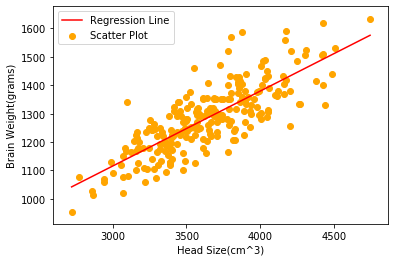

In [5]:
#Y_p=m_regline*X+y_intercept
max_x=np.max(X)
min_x=np.min(X)
Xp=np.linspace(min_x,max_x,1000)
l=len(Xp)

Yp=[]
for i in range(l):
    Yp.append((m_regline*Xp[i])+y_intercept)
    
#plot X - Yp
plt.plot(Xp,Yp,color="Red",label="Regression Line")
plt.scatter(X,Y,color="Orange",label="Scatter Plot")
plt.xlabel("Head Size(cm^3)")
plt.ylabel("Brain Weight(grams)")
plt.legend()
plt.show()

In [6]:
print(len(Y))
print(len(Yp))

237
1000


In [7]:
d=0
n=0
for i in range(len(X)):
    Ypred=(m_regline*X[i])+y_intercept
    d+=(Y[i]-mean_y)**2
    n+=(Ypred-Y[i])**2
R_square=1-(n/d)
R=np.sqrt(R_square)
print("R Square:{}".format(R_square))

R Square:0.6393117199570003


# Here we are using scikit learn library to get Linear Regression model. 

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#cannot use rank 1 matrix in skikit learn
X=X.reshape(-1,1)
#Build model
reg=LinearRegression()
#Fitting training data
reg=reg.fit(X,Y)
#predict
Y_pred=reg.predict(X)
#evaluate
r2_score=reg.score(X,Y)
print("R Square:{}".format(r2_score))
print("Mean Absolute Error:{}".format(mean_absolute_error(Y_pred,Y)))

R Square:0.639311719957
Mean Absolute Error:56.36724079565055


# Split entire dataset into train and test datasets. Fit model with training dataset and evaluate with test dataset and see the difference.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

## Split into validation and training data
train_X, test_X, train_y, test_y = train_test_split(X, Y,test_size=0.3, random_state=1)
#build model
linmodel=LinearRegression()
#Fit model to training data
linmodel.fit(train_X,train_y)
#predict
prediction=linmodel.predict(test_X)
#evaluate
val_mae = mean_absolute_error(test_y,prediction)
print("Mean Absolute Error:{}".format(val_mae))

Mean Absolute Error:56.935401199136244
